In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1 Data Understanding

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
dataset.shape

(690, 16)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,690.0,1.569047e+07,71506.473912,15565714.00,1.563169e+07,1.569016e+07,1.575190e+07,15815443.00
A1,690.0,6.782609e-01,0.467482,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.00
A2,690.0,3.156820e+01,11.853273,13.75,2.267000e+01,2.862500e+01,3.770750e+01,80.25
A3,690.0,4.758725e+00,4.978163,0.00,1.000000e+00,2.750000e+00,7.207500e+00,28.00
A4,690.0,1.766667e+00,0.430063,1.00,2.000000e+00,2.000000e+00,2.000000e+00,3.00
A5,690.0,7.372464e+00,3.683265,1.00,4.000000e+00,8.000000e+00,1.000000e+01,14.00
A6,690.0,4.692754e+00,1.992316,1.00,4.000000e+00,4.000000e+00,5.000000e+00,9.00
A7,690.0,2.223406e+00,3.346513,0.00,1.650000e-01,1.000000e+00,2.625000e+00,28.50
A8,690.0,5.231884e-01,0.499824,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.00
A9,690.0,4.275362e-01,0.495080,0.00,0.000000e+00,0.000000e+00,1.000000e+00,1.00


# 2. Spliting the data set

In [6]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [7]:
pd.Series(y).value_counts()

0    383
1    307
dtype: int64

# 3. Feature Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler =  MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X=X)

# 4 Training the SOM model

In [10]:
from minisom import MiniSom

In [11]:
som =  MiniSom(x=10,y=10,input_len=15,sigma=1.0,
               learning_rate=0.5,random_seed=42)

# To assign some intial weight
som.random_weights_init(data=X_scaled)
som.train_random(data=X_scaled,num_iteration=1000,verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.44918700487792046


# 5. Visualizing the results

In [12]:
from pylab import bone,pcolor,colorbar,plot,show

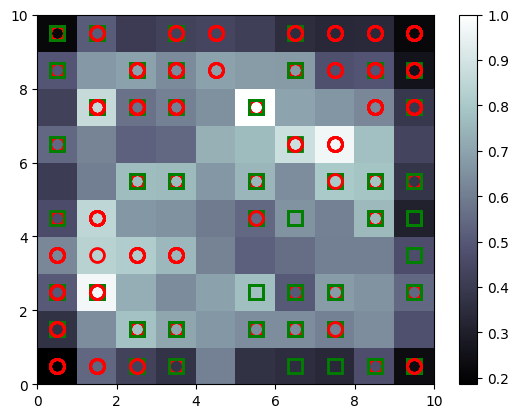

In [13]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for i,x in enumerate(X_scaled):
    w = som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize=10,
        markeredgewidth=2
        )
show()

# 6. Finding the fraud

In [14]:
mappings = som.win_map(X_scaled)
frauds = np.concatenate([mappings[(7,6)],mappings[(1,2)],mappings[(5,7)],mappings[(6,6)]],axis=0)
frauds = scaler.inverse_transform(frauds)
frauds.shape

(31, 15)

# 7 Finding Labels

In [15]:
customers = dataset.iloc[:,:-1].values

In [16]:
is_fraud = np.zeros(len(dataset))

In [17]:
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1       

# 8 Predicting Labels

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler2 = StandardScaler()
customers_scaled = scaler2.fit_transform(customers)

In [20]:
from keras.models import Sequential
from keras.layers import Dense

In [21]:
classifier = Sequential()

In [22]:
classifier.add(Dense(units=2,activation='relu',kernel_initializer='uniform',input_dim=15))
classifier.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

In [23]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
classifier.fit(customers,is_fraud,batch_size=1,epochs=2)

Epoch 1/2
690/690 [==============================] - 1s 543us/step - loss: 0.5732 - accuracy: 0.9551
Epoch 2/2
690/690 [==============================] - 0s 528us/step - loss: 0.4072 - accuracy: 0.9551


In [25]:
y_pred = classifier.predict(customers)

22/22 [==============================] - 0s 524us/step


In [28]:
y_pred_final = np.concatenate([dataset.iloc[:,0:1].values,y_pred],axis=1)
y_pred_final = y_pred_final[y_pred_final[:,1].argsort()]